In [47]:
import pandas as pd
import numpy as np

train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

In [48]:
# Show the amount of missing data in each column in the training set
train_set.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

# REPLACING MISSING DATA WITH APPROPRIATE "DATA_DESCRIPTION"-VALUES

In [49]:
# Fill NAN values of "Alley" with "No Alley"
train_set.Alley.fillna('No Alley', inplace=True)
test_set.Alley.fillna('No Alley', inplace=True)


# Fill NAN values of "BmstQual" with "No Basement"
train_set.BsmtQual.fillna('No Basement', inplace=True)
test_set.BsmtQual.fillna('No Basement', inplace=True)


# Fill NAN values of "BsmtCond" with "No Basement"
train_set.BsmtCond.fillna('No Basement', inplace=True)
test_set.BsmtCond.fillna('No Basement', inplace=True)


# Fill NAN values of "BsmtExposure" with "No Basement"
train_set.BsmtExposure.fillna('No Basement', inplace=True)
test_set.BsmtExposure.fillna('No Basement', inplace=True)



# Fill NAN values of "BsmtFinType1" with "No Basement"
train_set.BsmtFinType1.fillna('No Basement', inplace=True)
test_set.BsmtFinType1.fillna('No Basement', inplace=True)


# Fill NAN values of "BsmtFinType2" with "No Basement"
train_set.BsmtFinType2.fillna('No Basement', inplace=True)
test_set.BsmtFinType2.fillna('No Basement', inplace=True)


# Fill NAN values of "FireplaceQu" with "No Fireplace"
train_set.FireplaceQu.fillna('No Fireplace', inplace=True)
test_set.FireplaceQu.fillna('No Fireplace', inplace=True)


# Fill NAN values of "GarageType" with "No Garage"
train_set.GarageType.fillna('No Garage', inplace=True)
test_set.GarageType.fillna('No Garage', inplace=True)


# Fill NAN values of "GarageFinish" with "No Garage"
train_set.GarageFinish.fillna('No Garage', inplace=True)
test_set.GarageFinish.fillna('No Garage', inplace=True)


# Fill NAN values of "GarageQual" with "No Garage"
train_set.GarageQual.fillna('No Garage', inplace=True)
test_set.GarageQual.fillna('No Garage', inplace=True)


# Fill NAN values of "GarageCond" with "No Garage"
train_set.GarageCond.fillna('No Garage', inplace=True)
test_set.GarageCond.fillna('No Garage', inplace=True)


# Fill NAN values of "PoolQC" with "No Pool"
train_set.PoolQC.fillna('No Pool', inplace=True)
test_set.PoolQC.fillna('No Pool', inplace=True)


# Fill NAN values of "Fence" with "No Fence"
train_set.Fence.fillna('No Fence', inplace=True)
test_set.Fence.fillna('No Fence', inplace=True)


# Fill NAN values of "MiscFeature" with "No MiscFeature"
train_set.MiscFeature.fillna('No MiscFeature', inplace=True)
test_set.MiscFeature.fillna('No MiscFeature', inplace=True)

In [50]:
# Show the amount of missing data in each column in the training set
train_set.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

# ##### REMOVING COLUMNS WITH MORE THAN 10% MISSING DATA

In [51]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Store all columns with more than 10% missing data in a list
missing_columns = [col for col in train_set.columns if train_set[col].isnull().sum() / len(train_set) > 0.1]
# Add columns with more than 10% missing data in test set to the list
missing_columns = missing_columns + [col for col in test_set.columns if test_set[col].isnull().sum() / len(test_set) > 0.1]

# Remove all columns within the list from the training set
train_set.drop(missing_columns, axis=1, inplace=True)
test_set.drop(missing_columns, axis=1, inplace=True)

train_set.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [52]:
from collections import Counter

# Get numerical columns from train set
numerical_cols_train = train_set.select_dtypes(include=['int64', 'float64']).columns

# Use Heuristic Imputer to fill missing values in numerical columns
imp = IterativeImputer(max_iter=5, random_state=0)
imp.fit(train_set[numerical_cols_train])
train_set[numerical_cols_train] = imp.transform(train_set[numerical_cols_train])

# Remove SalePrice from numerical columns
numerical_cols_test = numerical_cols_train.drop('SalePrice')
# Use Heuristic Imputer to fill missing values in numerical columns in test set
imp.fit(test_set[numerical_cols_test])
test_set[numerical_cols_test] = imp.transform(test_set[numerical_cols_test])

In [53]:
from scipy.stats import skew

# Fix skewness of SalePrice
train_set.SalePrice = np.log1p(train_set.SalePrice)

skewed_features = train_set[numerical_cols_train].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_features[skewed_features > 0.5]
skew_index = high_skew.index

# Normalize skewed features using log_transformation

for i in skew_index:
    if i != 'SalePrice' and i != 'Id':
        train_set[i] = np.log1p(train_set[i])
        test_set[i] = np.log1p(test_set[i])

C:\Users\noudy\AppData\Roaming\JetBrains\DataSpell2022.1\projects\workspace\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

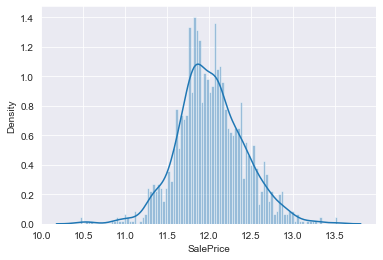

In [54]:
# Show graph of skewness of numerical columns
import seaborn as sns

sns.distplot(train_set.SalePrice, bins=100)

In [55]:
# Get categorical columns from train set
categorical_cols = train_set.select_dtypes(include=['object']).columns


# Fill in the missing data in the training set of categorical columns with the most common value in the column
for col in categorical_cols:
    train_set[col].fillna(train_set[col].value_counts().index[0], inplace=True)
    test_set[col].fillna(test_set[col].value_counts().index[0], inplace=True)
train_set.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [56]:
# Get categorical columns from train set
categorical_cols = train_set.select_dtypes(include=['object']).columns

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
train_set[categorical_cols] = ordinal_encoder.fit_transform(train_set[categorical_cols])
test_set[categorical_cols] = ordinal_encoder.transform(test_set[categorical_cols])

train_set

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,4.110874,3.0,9.042040,1.0,1.0,3.0,3.0,0.0,4.0,...,0.0,3.0,4.0,1.0,0.000000,2.0,2008.0,8.0,4.0,12.247699
1,2.0,3.044522,3.0,9.169623,1.0,1.0,3.0,3.0,0.0,2.0,...,0.0,3.0,4.0,1.0,0.000000,5.0,2007.0,8.0,4.0,12.109016
2,3.0,4.110874,3.0,9.328212,1.0,1.0,0.0,3.0,0.0,4.0,...,0.0,3.0,4.0,1.0,0.000000,9.0,2008.0,8.0,4.0,12.317171
3,4.0,4.262680,3.0,9.164401,1.0,1.0,0.0,3.0,0.0,0.0,...,0.0,3.0,4.0,1.0,0.000000,2.0,2006.0,8.0,0.0,11.849405
4,5.0,4.110874,3.0,9.565284,1.0,1.0,0.0,3.0,0.0,2.0,...,0.0,3.0,4.0,1.0,0.000000,12.0,2008.0,8.0,4.0,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,4.110874,3.0,8.976894,1.0,1.0,3.0,3.0,0.0,4.0,...,0.0,3.0,4.0,1.0,0.000000,8.0,2007.0,8.0,4.0,12.072547
1456,1457.0,3.044522,3.0,9.486152,1.0,1.0,3.0,3.0,0.0,4.0,...,0.0,3.0,2.0,1.0,0.000000,2.0,2010.0,8.0,4.0,12.254868
1457,1458.0,4.262680,3.0,9.109746,1.0,1.0,3.0,3.0,0.0,4.0,...,0.0,3.0,0.0,3.0,7.824446,5.0,2010.0,8.0,4.0,12.493133
1458,1459.0,3.044522,3.0,9.181735,1.0,1.0,3.0,3.0,0.0,4.0,...,0.0,3.0,4.0,1.0,0.000000,4.0,2010.0,8.0,4.0,11.864469


In [57]:
useless = ['GarageYrBlt','YearRemodAdd']
train_set = train_set.drop(useless, axis = 1)
test_set = test_set.drop(useless, axis = 1)

# Correlation matrix for train_set
corr_matrix = train_set.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

# Create list of variables with correlation greater than 0.5 with SalePrice
corr_vars = [k for k in corr_matrix.index if corr_matrix['SalePrice'][k] > 0.4 or corr_matrix['SalePrice'][k] < -0.4]
# Remove SalePrice from corr_vars
corr_vars.remove('SalePrice')
corr_vars

['OverallQual',
 'YearBuilt',
 'MasVnrArea',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'HeatingQC',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'OpenPorchSF']

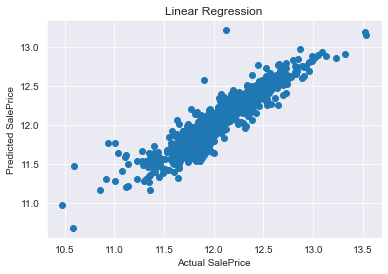

Multi linear regression: 
R2-score: 0.8474283299018576
MAE: 0.11635399829787492
RMSE: 0.15950523730020763


array([129093.43876176, 305709.47711501, 117828.1202084 , 167199.56561987,
       324675.20773702,  81114.77465135, 208632.86340966, 166333.94928078,
        78157.65732989, 122000.52662131, 146575.97445655, 108543.03252151,
       101352.68478446, 209218.89825953, 190265.98069839, 118959.02037576,
       214455.10768304, 127255.29042104, 118648.46432919, 206884.27368493,
       177258.25759666, 217615.82395543, 174833.43848171, 117053.81397709,
       209697.24597175, 169046.25433139, 199599.58623367, 101709.30748773,
       186979.55685584, 214933.20692827, 120632.84601626, 245730.79651037,
       177320.718251  , 102284.35341441, 273902.10859642, 144066.1132825 ,
       145375.9486928 , 218605.39009978, 302573.53801771, 104615.57337873,
       129167.72449883, 245920.75478115, 109026.05140879, 353266.51174252,
       116214.71906622, 143011.28268086, 109343.38263515, 119824.04517183,
       390172.09795558, 127129.15991803, 111192.03784135, 197069.89660675,
       128167.91456421, 3

In [58]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

# Predict SalePrice using all variables with correlation greater than 0.5 or less than -0.5 with SalePrice
X = train_set[corr_vars]
# Drop SalePrice from X
y = train_set['SalePrice']


X_train,X_val,y_train,y_val = train_test_split(X,y, test_size = 0.5, random_state=42)

X_train,y_train = X, y

# Linear Regression
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
predictions_linear_regression = linear_regression.predict(X_val)

# Show graph of predicted values vs actual values
plt.scatter(y_val, predictions_linear_regression)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Linear Regression')
plt.show()

print("Multi linear regression: ")
print("R2-score:", r2_score(y_val, predictions_linear_regression))
print("MAE:", mean_absolute_error(y_val, predictions_linear_regression))

# Calculate the RMSE between logarithm of the predicted and the logarithm of the actual values
print("RMSE:", sqrt(mean_squared_error(y_val, predictions_linear_regression)))

# Create list of predictions without the fixed skewness
predictions_linear_regression_no_skewness = np.exp(predictions_linear_regression)
predictions_linear_regression_no_skewness

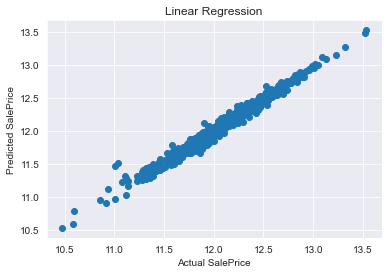

Catboost Regression: 
R2-score: 0.9766700499578982
MAE: 0.045663252581095125
RMSE: 0.06237275135543978
RMSE: 10566.001273091058


In [62]:
from catboost import CatBoostRegressor

# train is the dataframe the train_set without the SalePrice column
X = train_set[corr_vars]
# target_log is the SalePrice column
y = train_set['SalePrice']

X_train,X_val,y_train,y_val = train_test_split(X, y, test_size = 0.5, random_state=42)

X_train,y_train = X, y

# Cat Boost Regressor

cat = CatBoostRegressor()
cat_model = cat.fit(X_train,y_train,
                    eval_set = (X_val,y_val),
                    verbose = 0)
predictions_cat = cat_model.predict(X_val)

# Show graph of predicted values vs actual values
plt.scatter(y_val, predictions_cat)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Linear Regression')
plt.show()

print("Catboost Regression: ")
print("R2-score:", r2_score(y_val, predictions_cat))
print("MAE:", mean_absolute_error(y_val, predictions_cat))

# Calculate the RMSE between logarithm of the predicted and the logarithm of the actual values
print("RMSE:", sqrt(mean_squared_error(y_val, predictions_cat)))

# Create list of predictions without the fixed skewness
predictions_cat_no_skewness = np.exp(predictions_cat)
y_val_no_skewness = np.exp(y_val)

print("RMSE:", sqrt(mean_squared_error(y_val_no_skewness, predictions_cat_no_skewness)))

[22:43:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "loss", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




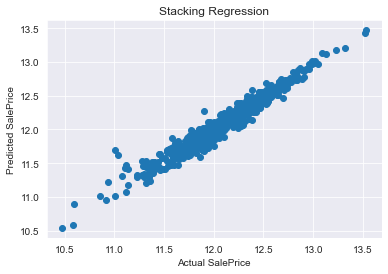

XGB Regression: 
R2-score: 0.9481403535749493
MAE: 0.06744072183416495
RMSE: 0.09299353845662718


array([134442.67 , 321976.47 , 114220.   , 161837.42 , 311483.97 ,
        80597.36 , 270897.5  , 159479.94 ,  80799.53 , 126127.14 ,
       145820.39 , 117793.59 ,  83562.34 , 207779.78 , 176837.22 ,
       124022.48 , 194718.8  , 134563.39 , 109183.29 , 206408.16 ,
       167235.58 , 221592.36 , 173181.36 , 126221.36 , 202707.17 ,
       172328.77 , 179600.94 , 108378.16 , 180004.4  , 201103.22 ,
       126882.85 , 260672.89 , 200507.27 , 115209.85 , 258194.56 ,
       143152.66 , 144587.67 , 212873.33 , 305454.06 , 106138.51 ,
       131218.77 , 241145.56 , 118984.51 , 263292.03 , 130810.7  ,
       124279.39 , 123182.016, 129747.44 , 451307.47 , 138312.88 ,
       120840.83 , 206127.06 , 118767.055, 294954.34 , 145703.77 ,
       225718.2  , 201320.25 , 155612.16 , 143445.11 , 107376.84 ,
        70954.23 , 143253.31 , 314530.8  , 281878.   , 276077.72 ,
       211059.28 , 104948.39 , 299051.4  , 112998.734, 166379.89 ,
       119836.88 , 142081.86 , 111209.61 ,  92628.65 , 547585.

In [207]:
from mlxtend.regressor import StackingCVRegressor
import catboost as cb
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, HuberRegressor

xgb = XGBRegressor(n_estimators = 1000, learning_rate = 0.01,
                   max_depth = 5, min_samples_split = 12, min_samples_leaf = 16,
                   loss = "huber", max_features = "sqrt", random_state = 1)
xgb_model = xgb.fit(X_train, y_train)
predictions_xgb = xgb_model.predict(X_val)


# Show graph of predicted values vs actual values
plt.scatter(y_val, predictions_xgb)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Stacking Regression')
plt.show()


print("XGB Regression: ")
print("R2-score:", r2_score(y_val, predictions_xgb))
print("MAE:", mean_absolute_error(y_val, predictions_xgb))

# Calculate the RMSE between logarithm of the predicted and the logarithm of the actual values
print("RMSE:", sqrt(mean_squared_error(y_val, predictions_xgb)))

# Create list of predictions without the fixed skewness
predictions_xgb_no_skewness = np.exp(predictions_xgb)
predictions_xgb_no_skewness

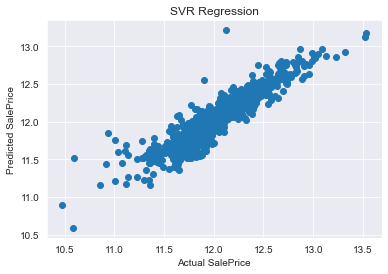

SVR Regression: 
R2-score: 0.8369256013640062
MAE: 0.12062707982474312
RMSE: 0.16490388609857037


array([127806.78698712, 301892.68809521, 126158.86527978, 168582.54835739,
       309440.19823455,  78152.34565365, 222810.99935395, 160777.31265771,
        74945.39858542, 123698.74522776, 148477.50664543, 107145.36236947,
       101564.69610192, 209239.00107398, 184038.09840427, 122062.31657844,
       213760.70293873, 130933.36309692, 122967.34042694, 209150.39368663,
       180780.71797913, 202633.25760667, 176660.38370554, 120794.70634217,
       210968.26521096, 175442.9397189 , 203549.14377731, 103604.94738047,
       185515.34820888, 219591.02432203, 142019.94801157, 236247.76367574,
       174361.16119663, 101632.63286234, 258046.22103434, 139156.88561353,
       145851.86136858, 217256.49064189, 283473.06507133, 110669.37209199,
       135566.48198971, 243902.12237388, 105721.78304776, 344389.99903332,
       116772.22966117, 166717.28834634, 107759.91030244, 115359.3996039 ,
       377363.18259146, 127755.39971656, 114321.70356661, 192982.76037143,
       132529.00679144, 3

In [208]:
svr_model = SVR(kernel='linear', C=0.1)
svr_model.fit(X_train, y_train)
predictions_svr = svr_model.predict(X_val)


# Show graph of predicted values vs actual values
plt.scatter(y_val, predictions_svr)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('SVR Regression')
plt.show()


print("SVR Regression: ")
print("R2-score:", r2_score(y_val, predictions_svr))
print("MAE:", mean_absolute_error(y_val, predictions_svr))

# Calculate the RMSE between logarithm of the predicted and the logarithm of the actual values
print("RMSE:", sqrt(mean_squared_error(y_val, predictions_svr)))

# Create list of predictions without the fixed skewness
predictions_svr_no_skewness = np.exp(predictions_svr)
predictions_svr_no_skewness

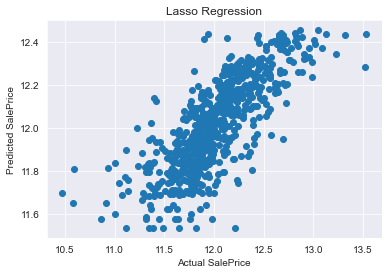

Lasso Regression: 
R2-score: 0.5435771201075252
MAE: 0.19961979985955763
RMSE: 0.27588094243210604


In [209]:
# Lasso Regression
from sklearn.linear_model import Lasso


lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
predictions_lasso = lasso.predict(X_val)


# Show graph of predicted values vs actual values
plt.scatter(y_val, predictions_lasso)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Lasso Regression')
plt.show()


print("Lasso Regression: ")
print("R2-score:", r2_score(y_val, predictions_lasso))
print("MAE:", mean_absolute_error(y_val, predictions_lasso))


# Calculate the RMSE between logarithm of the predicted and the logarithm of the actual values
print("RMSE:", sqrt(mean_squared_error(y_val, predictions_lasso)))

In [63]:
# Predict SalePrice using all variables with correlation greater than 0.5 or less than -0.5 with SalePrice
X = test_set[corr_vars]

# Stacked model

predictions_stacked = cat.predict(X)
predictions_stacked_exp = np.expm1(predictions_stacked)

In [64]:
predictions_stacked_exp

array([132877.17591396, 147817.5278654 , 174382.18184554, ...,
       149360.99807426, 106344.04353578, 214225.38893631])

In [116]:
submission = pd.DataFrame()
# Convert values of Id column to int64
submission["Id"] = test_set["Id"]
submission['Id'] = test_set['Id'].astype(int)
submission["SalePrice"] = predictions_stacked_exp
submission.to_csv("submission.csv", index = False)
submission.head()

,Id,SalePrice
0,1461,132878.175914
1,1462,147818.527865
2,1463,174383.181846
3,1464,182967.225896
4,1465,194375.213001
